<h1>Lesson 5. Model selection: City of Seattle Wage Data</h1>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Space_Needle002.jpg/320px-Space_Needle002.jpg" style="height:200px;">
  
<p>In this exercise you will use recent wage data from City of Seattle to build a model that predicts hourly rate based on:</p>

<ul>
<li>Department</li>
<li>Last.Name</li>
<li>First.Name</li>
<li>Job.Title</li>
</ul>
<p>This dataset contains 12,346 entries in which we will try to predict 'Hourly.Rate'</p>


In [62]:
# Load the data
wage_url = "https://data.seattle.gov/api/views/2khk-5ukd/rows.csv?accessType=DOWNLOAD"
wage = read.csv(wage_url, stringsAsFactors=F)

head(wage)
str(wage)

Department,Last.Name,First.Name,Job.Title,Hourly.Rate
Arts and Culture,Boas-Du Pree,Sandra,Admin Staff Asst,34.48
Arts and Culture,Bolisay,Ronald,Publc Relations Spec,29.09
Arts and Culture,Chai,Grace,Cooperative Intern *,16.12
Arts and Culture,Childers,Calandra,"StratAdvsr3,Exempt",48.71
Arts and Culture,Crooks,Jennifer,Arts Prgm Spec,35.93
Arts and Culture,Davis,Lara,"StratAdvsr1,General Govt",39.29


'data.frame':	12346 obs. of  5 variables:
 $ Department : chr  "Arts and Culture" "Arts and Culture" "Arts and Culture" "Arts and Culture" ...
 $ Last.Name  : chr  "Boas-Du Pree" "Bolisay" "Chai" "Childers" ...
 $ First.Name : chr  "Sandra" "Ronald" "Grace" "Calandra" ...
 $ Job.Title  : chr  "Admin Staff Asst" "Publc Relations Spec" "Cooperative Intern *" "StratAdvsr3,Exempt" ...
 $ Hourly.Rate: num  34.5 29.1 16.1 48.7 35.9 ...


<h3>Q.1. Write a command that will calculate the number of unique values for each feature.</h3>

In [63]:
# Command(s)
sapply(X = colnames(wage),
      FUN = function(x) {length(unique(wage[, x]))})

Department   Last.Name  First.Name   Job.Title Hourly.Rate 
         36        7446        3319        1026        1730

<h3>Q.2. Write a command that will show mean wage for each department.</h3>

In [64]:
# Command (s):
dept <- unique(wage$Department)

deptAvgWage <- sapply(X = dept,
                       FUN = function(x) {mean(wage[wage$Department == x, "Hourly.Rate"])})
head(round(deptAvgWage, 2),13)

Arts and Culture                   City Auditor 
                         34.91                          56.01 
            City Budget Office City Employees Retirement Syst 
                         49.10                          49.02 
                    City Light      Civil Service Commissions 
                         42.45                          16.03 
   Community Police Commission      Construction and Land Use 
                         43.12                          20.31 
Dept of Education & Early Lrng     Dept of Finance & Admn Svc 
                         41.18                          39.37 
         Dept of Neighborhoods                Fire Department 
                         16.12                          43.17 
                Human Services 
                         30.27

<h3>Q.3. For the 'Department' feature, create one-hot encodings for each department and add them to the data frame. (i.e. Department.Arts.and.Culture, Department.Legislative)</h3>

In [65]:
# Command(s) 
dept <- unique(wage$Department)
Department_onehot <- sapply(X = dept,
                            FUN = function(x) {ifelse(wage$Department == x, 1, 0)})

colnames(Department_onehot) <- paste("Department",
               stringi::stri_replace_all(str = colnames(Department_onehot), replacement = '.', regex = '\\s'),
               sep = '.')

wage <- cbind(wage,Department_onehot)

# sanity checks
# dim(wage)
# colnames(wage)

<h3>Q.4. Use the 'gender' library to determine gender of the person based on their First.Name.</h3>
<p>Note that the library returns the most likely gender and associated probability. Introduce IsMale feature to the 'wage' data.frame. Encode the probability in the 'wage' data.frame as log-odds with upper/lower boundary as +5/-5.</p>

In [66]:
# install.packages("gender")
# install.packages("genderdata", repos = "http://packages.ropensci.org")
# library("gender")
# library("genderdata")

# gender(names=c("Lisa", "Robin", "Madison", "Judy"))

> **NOTE Q4: Cannot get it to work! Skipping this question per Tomasz instruction. **

<h3>Q.5. Are men paid more than women in the City of Seattle?</h3>

[1] 0


	Welch Two Sample t-test

data:  wage$Hourly.Rate by wage$IsMale
t = -9.991, df = 8064.9, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.155835 -2.120586
sample estimates:
mean in group 0 mean in group 1 
       37.22846        39.86667 


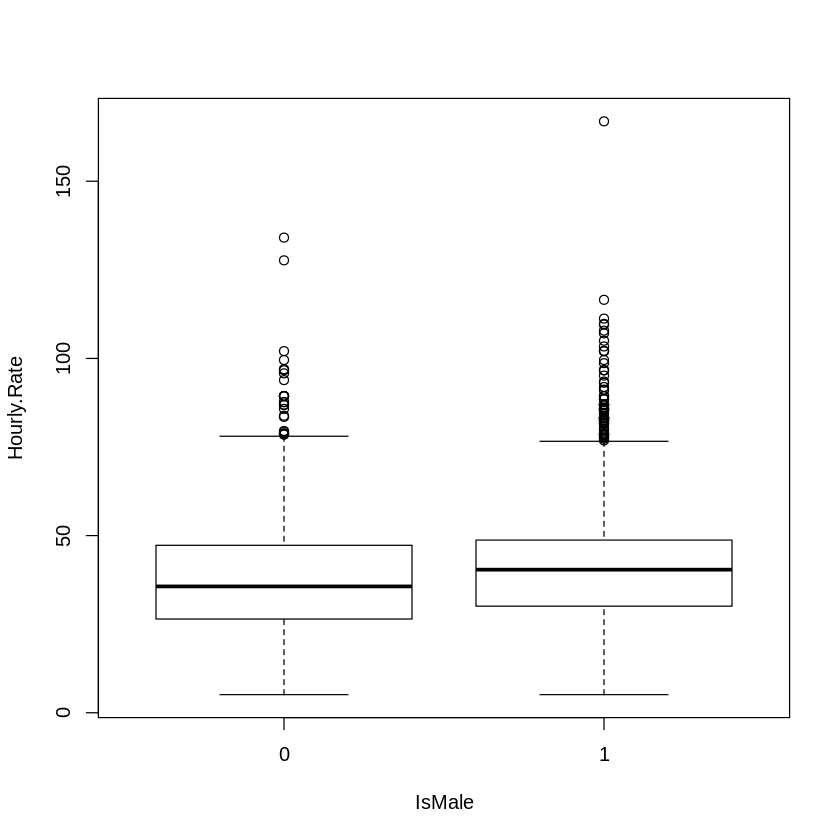

In [67]:
wage_url <- "https://s3-us-west-2.amazonaws.com/bitflip-software/temp/wage_with_gender.csv"
wageMB <- read.csv(wage_url, stringsAsFactors=F)

# combine wage data set with gender feature from wageMB
ifelse(all.equal(rownames(wage),rownames(wageMB)), wage$IsMale <- wageMB$is_male, "ERROR")
       
# boxplot
boxplot(wage$Hourly.Rate ~ wage$IsMale,
        xlab = "IsMale",
        ylab = "Hourly.Rate")

# t-test
t.test(formula = wage$Hourly.Rate ~ wage$IsMale,
       mu = 0,
       alternative = "two.sided",
       conf.level = 0.95)

> **ANSWER Q5:**  
> ** NOTE: I used Mathew Briggs' data set. He managed to get gender info.**  
> The two-sample t-test indicated that there is a statistically significant (p-value < 2.2e-16) difference in wage between mean and women. On average, women earn \$2.64/hour less than men.

<h3>Q.6. Generate a Dracula Count feature for the Job.Title feature and attach it to the wage data.frame.</h3>

In [68]:
# Commands
# this question ignored per Tomasz's instruction

<h3>Q.7. Split the data to 70% train / 30% test. Train the linear model on the train dataset and evaluate its performance on the test dataset.</h3>
<p>The model should have the following features:</p>
<ul>
<li>One-hot encodings of the department</li>
<li>Two features related to gender</li>
<li>Dracula Count features for Job.Title</li>
</ul>

In [69]:
# split data into train and test set
# NOTE: excluding Department, Last.Name, First.Name, Job.Title from model training
set.seed(211)
idx <- sample(x = 2, size = nrow(wage), replace = TRUE, prob = c(0.7,0.3))
wage.cols <- c(5:42)
wage.train <- wage[idx == 1, wage.cols]
wage.test <- wage[idx == 2, wage.cols]

# sanity checks
# dim(wage.train)
# dim(wage.test)

modQ7 <- lm(Hourly.Rate~., data=wage.train)
# summary(modQ7)

# Evaluate the model performance on test dataset
wage.pred <- data.frame(predict(object = modQ7, newdata = wage.test, interval = "confidence"))
# str(wage.pred)

# fraction of observed that fall within 95% confidence interval of predicted
correct <- sum(ifelse(wage.pred$lwr <= wage.test$Hourly.Rate & wage.test$Hourly.Rate <= wage.pred$upr, 1, 0))
fract_correct <- correct / length(wage.test$Hourly.Rate)
fract_correct

Warning message in predict.lm(object = modQ7, newdata = wage.test, interval = "confidence"):
“prediction from a rank-deficient fit may be misleading”

[1] 0.08748646

> ** ANSWSER Q7:**
> To evaluate model performance, I used _predict()_ function on the test data to predict Hourly.Rate for each observation in the test data. Then I asked: "What fraction of the **observed** values fall within the 95% confidence interval of the **predicted** value? The answer is a lousy 8.7%. 

<h3>Q.8. Perform recursive feature elimination on the dataset. Plot RMSD on the test set as the function of number of features used in the model.</h3>

Warning message in predict.lm(object = fit, newdata = wage.test):
“prediction from a rank-deficient fit may be misleading”

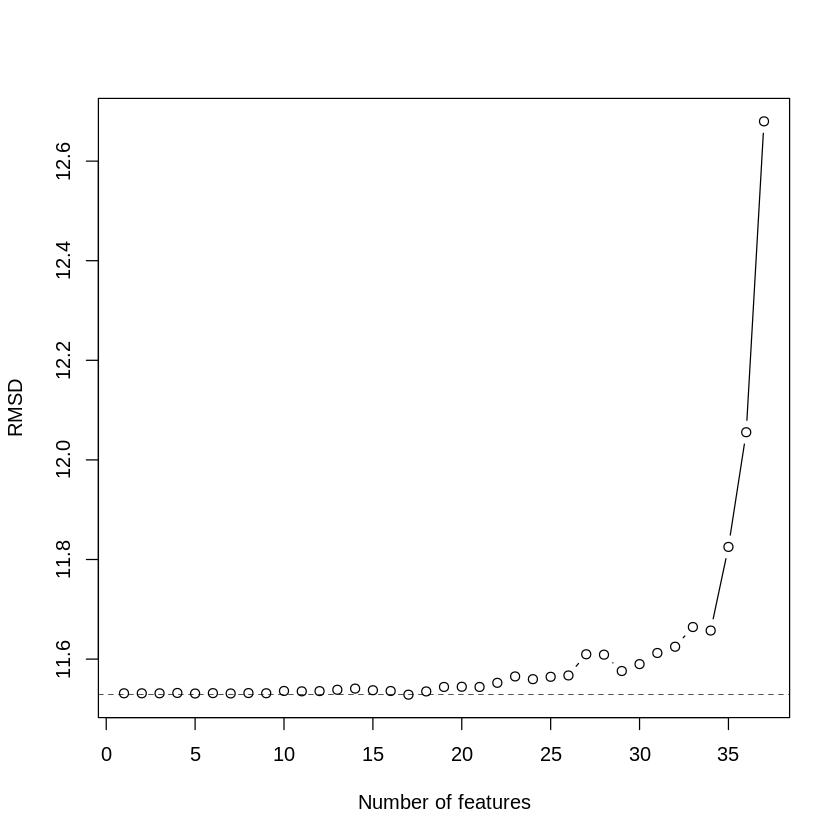

In [71]:
wage.tmp <- wage.train

rmsd.out <- c()

while(length(names(wage.tmp)) > 1)
    {
        ### Perform RFE - Use coefficient Z-score or Probability to determine which feature is the least likely, like this:
        fit <- lm(Hourly.Rate~., data=wage.tmp)
        fit.coef <- summary(fit)$coefficients[,4] # get p-value for each coefficient
        wage.tmp <- wage.tmp[, -which.max(fit.coef)] # remove feature with least significant p-value

        ### run model on test data
        wage.tmp.pred <- predict(object = fit, newdata = wage.test)
        
        ### And use the RMSD score to estimate the model accuracy:
        rmsd.out <- c(sqrt(mean((wage.tmp.pred - wage.test$Hourly.Rate)^2)), rmsd.out)
    }

# head(wage.tmp)
# dim(wage.tmp)
# rmsd.out

# Plot RMSD as the function of # of features
plot(x = sort(c(1:length(rmsd.out)), decreasing = TRUE),
     y = rmsd.out, type = "b", xlab = "Number of features", ylab = "RMSD")
abline(h = min(rmsd.out), lty=2, lwd = 0.5)

> **ANSWER Q8**  
> Plot of numbers of features versus RMSD. Horizontal dashed line indicates minimum RMSD. It appears that for this model, the maximum performance is with about 20 features or less.

<h3>Q.9. Implement your model as a shiny app.</h3>
<p>In the app, the person should be able to input:</p>
<ul>
<li>Department (as drop-down list)</li>
<li>Gender (as drop-down list)</li>
<li>Job.Title (as drop-down list)</li>
</ul>
<p>and be given expected hourly salary</p>

In [ ]:
# For this, create separate app.R file that you should submit together with the Jupyter notebook.

> NOTE Q9: I used dummy model, consisting of Department, Job.Title, Hourly.Rate, and IsMale column of the wage data set. For the shiny app, I was not able to get the server to evaluate and display the predicted hourly wage.